<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>To begin: Click anywhere in this cell and press <kbd>Run</kbd> on the menu bar. This executes the current cell and then highlights the next cell. There are two types of cells. A <i>text cell</i> and a <i>code cell</i>. When you <kbd>Run</kbd> a text cell (<i>we are in a text cell now</i>), you advance to the next cell without executing any code. When you <kbd>Run</kbd> a code cell (<i>identified by <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>) you advance to the next cell after executing all the Python code within that cell. Any visual results produced by the code (text/figures) are reported directly below that cell. Press <kbd>Run</kbd> again. Repeat this process until the end of the notebook. <b>NOTE:</b> All the cells in this notebook can be automatically executed sequentially by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should anything crash then restart the Jupyter Kernal by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
<img src="https://github.com/CIMCB/MetabComparisonBinaryML/blob/master/cimcb_logo.png?raw=true" width="180px" align="right" style="padding: 20px">


<h1> PCR_ST001047 </h1>

<br>
<br>
<br>
<p style="text-align: justify"> The study used in this tutorial has been previously published by  <a href="https://www.nature.com/articles/bjc2015414">Chan et al. (2016)</a>, and the deconvolved and annotated data file deposited at the Metabolomics Workbench data repository (Study ID: ST001047). The data can be accessed directly via its project DOI: <a href="http://dx.doi.org/DOI:10.21228/M8B10B">10.21228/M8B10B</a>. This workflow requires data to be formatted as a Microsoft Excel file, using the Tidy Data framework (i.e. each column is a variable, and row is an observation). As such, the Excel file contains a Data Sheet and Peak Sheet. The Data Sheet contains all the metabolite concentrations and metadata associated with each observation (requiring the inclusion of the columns: Idx, SampleID, and Class). The Peak Sheet contains all the metadata pertaining to each measured metabolite (requiring the inclusion of the columns: Idx, Name, and Label). Please inspect the Excel file <a href="https://github.com/CIMCB/MetabComparisonBinaryML/blob/master/dynamic/data/ST001047.xlsx?raw=true">ST001047.xlsx</a> used in this workflow before proceeding.</p>

<p style="text-align: justify">This is a urine NMR data set consisting of 149 named metabolites. The primary outcome for this paper was the urine was Gastric Cancer (GC; n=43) v Benign Tumor (BN; n=40) v Healthy Control (HE; n=40). For the purposes of this publication we compare only the GC vs HE samples in a binary discrimiant analysis.</p>


<br>


</ol> 
</div>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    
<h1> PCR Workflow </h1> 
<br>
<p style="text-align: justify"> This Jupyter Notebook implements the complete workflow for creating, optimising, and evaluating a principal component regression (PCR) model. PCR is a two-stage algorithm combining principal component analysis (PCA) and multiple linear regression (MLR), where the first N principal component scores act as the independent variables of the MLR, and the binary classification the is the dependent variable. The value of N is chosen by the user. <b> PCA was implemented using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a>
    and MLR using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Linear Regression</a> from scikit-learn.</b></p>
<i style="text-align: justify"> Please refer to the 'cimcb' package documentation for further details regarding this specific implementation: <a href="https://cimcb.github.io/cimcb">https://cimcb.github.io/cimcb</a></i>
 
<br>
<br>
<b style="text-align: justify"> PCR uses the following Hyperparameter(s):</b>
<ul style="list-style-type: square;">
    <li><code>n_components</code>: number of principal components projected into the MLR (default = 2)</li>
</ul>
<i style="text-align: justify">The purpose of each hyperparameter is explained here:  <a href="https://link.springer.com/content/pdf/10.1007/978-3-642-04898-2_455.pdf">Jolliffe (2011)</a></i>
 
<br>
<br>

<b style="text-align: justify"> The notebook workflow is broken into the following steps:</b>

<ol>
    <li><b><i>Import Packages</i></b>: First, the Python packages required for this workflow need to be imported (<a href="http://www.numpy.org/"><code>numpy</code></a>, <a href="https://pandas.pydata.org/"><code>pandas</code></a>, and <a href="https://cimcb.github.io/cimcb"><code>cimcb</code></a>).
</li>
    <li><b><i>Load Data & Peak Sheet:</i></b> From the Excel spreadsheet, import the Data and Peak spreadsheets and create two respective <a href="https://pandas.pydata.org/">Pandas</a> tables: <code>DataTable</code> and <code>PeakTable</code>.</li>
    <li><b><i>Extract X & Y:</i></b> Next, we reduce the data in <code>DataTable</code> to include only those observations needed for the binary comparison and create a new table: <code>DataTable2</code>. We define one column of the data table to be the "outcome" variable <code>Outcomes</code>, and convert the class labels in this column to a binary outcome vector <code>Y</code>, where <code>1</code> is the positive outcome, and <code>0</code> the negative outcome (eg. case=1 & control=0). A new variable <code>peaklist</code> is created to hold the names (M1...Mn) of the metabolites to be used in the discriminant analysis. To create an independent dataset to evaluate, <a href="https://scikit-learn.org/stable/">scikit-learn</a> module's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"><code>train_test_split()</code></a> function is used. The data is split into 2/3rd training (<code>DataTrain</code> and <code>YTrain</code>), and 1/3rd test (<code>DataTest</code> and <code>YTest</code>). The metabolite data corresponding to <code>peaklist</code> is extracted from <code>DataTrain</code> and placed in a matrix <code>XTrain</code>. The <code>XTrain</code> matrix is log-transformed and auto-scaled, with missing values imputed using k-nearest neighbours (k=3). Then the metabolite data corresponding to <code>peaklist</code> is extracted from <code>DataTest</code> and placed in a matrix <code>XTest</code>. The <code>XTest</code> matrix is log-transformed and auto-scaled (using mu and sigma from <code>XTrain</code>), with missing values imputed using k-nearest neighbours (k=3).
    <li><b><i>Hyperparameter Optimisation:</i></b> Here, we use the helper function <code>cb.cross_val.KFold()</code> to carry out 5-fold cross-validation of a set of PCR models configured with different numbers of principal components (1 to 30). This helper function is generally applicable, and the values being passed to it are: 
    <ul>
    <li>The class of model to be created by the function, <code>cb.model.PCR</code>.</li>
        <li>The metabolite matrix, <code>XTknn</code>, and binary outcome vector, <code>Y</code>.</li>
        <li>A dictionary, <code>param_dict</code>, describing key:value pairs where the key is a parameter that is passed to the model, and the value is a list of values to be passed to that parameter.</li>
        <li>The number of folds in the cross-validation, <code>folds</code>, and the number of Monte Carlo repetitions of the k-fold CV, <code>n_mc</code>.</li></ul>
When <code>cv.run()</code> followed by <code>cv.plot(metric='r2q2')</code> are run the results are displayed as 2 plots of $R^2$ and $Q^2$ statistics: (a) the difference ($R^2 - Q^2$) vs. $Q^2$, and (b) absolute values of both $R^2$ and $Q^2$ against the number of components. These plots are used to aid in selecting the optimal number of components.</li>
    <li><b><i>Build Model & Evaluate:</i></b> Here, we use the class <code>cb.model.PCR()</code> to building a PCR model using the optimal hyperparameter values determined in step 4. The model is trained on the training dataset, <code>XTrainKnn</code>, and tested on the independent test dataset, <code>XTestKnn</code>. Next, the trained model's <code>.evaluate()</code> method is used to visualise model performance for both the training and independent test dataset using: a <a href="https://www.data-to-viz.com/graph/violin.html">violin plot</a> showing the distributions of negative and positive responses as violin and box-whisker plots; a <a href="https://books.google.com.au/books?id=7WBMrZ9umRYC">probability density function</a> plot for each response type, and a <a href="https://doi.org/10.1007/s11306-012-0482-9">ROC curve</a> that displays the curve for the training dataset (green) and test dataset (yellow).
   <li><b><i>Bootstrap Evaluation:</i></b> Finally, to create an estimate of the robustness and a measure of generalised predictive ability of this model we perform  <a href="https://link.springer.com/article/10.1007%2FBF00058655">bootstrap aggregation</a> (Bagging) using the helper function <code>cb.bootstrap.Per()</code> with 100 boostrapped models. This generates a population of 100 model predictions for both the training set (in-bag prediction - IB) and the holdout test set (out-of-bag - OOB) from the full dataset, with the metabolite matrix, <code>XBootKnn</code>, and binary outcome vector, <code>Y</code>. These predictions are visualised with a box-violin and probability density function plot for the aggregate model. The ROC curve displays the curve for the training dataset (green) and test dataset (yellow) from section 5 with 95% confidence intervals (light green band = IB & light yellow band = OOB).
  <li><b><i>Export Results:</i></b> Exporting the model evaluation results as an Excel spreadsheet.</li>
</ol> 

</div>

### 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import cimcb as cb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print('All packages successfully loaded')

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


All packages successfully loaded


### 2. Load Data & Peak Sheet

In [2]:
home = 'data/' 
file = 'ST001047.xlsx' 

DataTable,PeakTable = cb.utils.load_dataXL(home + file, DataSheet='Data', PeakSheet='Peak') 

Loadings PeakFile: Peak
Loadings DataFile: Data
Data Table & Peak Table is suitable.
TOTAL SAMPLES: 140 TOTAL PEAKS: 149
Done!


### 3. Extract X & Y

In [3]:
# Clean PeakTable and Extract PeakList
RSD = PeakTable['QC_RSD']   
PercMiss = PeakTable['Perc_missing']  
PeakTableClean = PeakTable[(RSD < 20) & (PercMiss < 10)]   
PeakList = PeakTableClean['Name']  

# Select Subset of Data (Class "GC" or "HE" only)
DataTable2 = DataTable[(DataTable.Class == "GC") | (DataTable.Class == "HE")]

# Create a Binary Y Vector 
Outcomes = DataTable2['Class']                                  
Y = [1 if outcome == 'GC' else 0 for outcome in Outcomes]         
Y = np.array(Y)   

# Split Data into Train (2/3rd) and Test (1/3rd)
DataTrain, DataTest, YTrain, YTest = train_test_split(DataTable2, Y, test_size=1/3, stratify=Y, random_state=40)

# Extract Train Data                          
XTrain = DataTrain[PeakList]                                    
XTrainLog = np.log(XTrain)                                          
XTrainScale, mu, sigma = cb.utils.scale(XTrainLog, method='auto', return_mu_sigma=True)              
XTrainKnn = cb.utils.knnimpute(XTrainScale, k=3)    

# Extract Test Data
XTest = DataTest[PeakList]                                    
XTestLog = np.log(XTest)                                          
XTestScale = cb.utils.scale(XTestLog, method='auto', mu=mu, sigma=sigma)           
XTestKnn = cb.utils.knnimpute(XTestScale, k=3)   

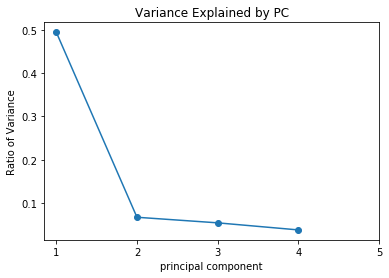

In [4]:
# STEP 5. Execution of PCA

from sklearn.decomposition import PCA
n_components = 4

pca = PCA(n_components)
y_pca = pca.fit_transform(XTrainKnn)
components = pca.components_
variance = pca.explained_variance_ratio_

# Plot the Scree plot of PCA
plt.plot(range(1, len(variance)+1), variance, 'o', linestyle = '-')
plt.xticks(np.arange(1, 6, 1.0))
plt.xlabel('principal component')
plt.ylabel('Ratio of Variance')
plt.title('Variance Explained by PC')
plt.show()

In [20]:
len(YTrain)

55

In [22]:
len(XTrainKnn)

55

In [25]:
components.shape

(4, 52)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


IndexError: index 52 is out of bounds for axis 1 with size 52

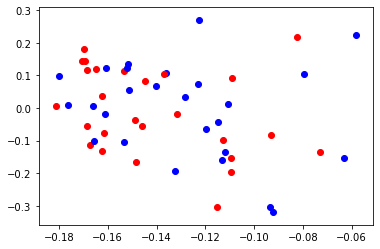

In [19]:
# plot the pc1 vs PC2 with labels
for i in range(len(YTrain)):
    print(i)
    if YTrain[i] == 1:
        plt.scatter(components[0,i], components[1,i], color = 'red', label = 'GC')
    else:
        plt.scatter(components[0,i], components[1,i], color = 'blue', label = 'HE')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PC1 vs PC2")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='large')
plt.show()

### 4. Hyperparameter Optimisation

In [ ]:
# Parameter Dictionary
param_dict = {'n_components': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]} 

# Initialise
cv = cb.cross_val.KFold(model=cb.model.PCR,                      
                        X=XTrainKnn,                                 
                        Y=YTrain,                               
                        param_dict=param_dict,                   
                        folds=5,
                        n_mc=10)                                

# Run and Plot
cv.run()  
cv.plot(metric='r2q2')

### 5. Build Model & Evaluate

In [ ]:
# Build Model
model = cb.model.PCR(n_components=3)
YPredTrain = model.train(XTrainKnn, YTrain)
YPredTest = model.test(XTestKnn)

# Put YTrain and YPredTrain in a List
EvalTrain = [YTrain, YPredTrain]

# Put YTest and YPrestTest in a List
EvalTest = [YTest, YPredTest]

# Evaluate Model (include Test Dataset)
model.evaluate(testset=EvalTest) 

### 6. Bootstrap Evaluation

In [ ]:
# Extract X Data
XBoot = DataTable2[PeakList]
XBootLog = np.log(XBoot)
XBootScale = cb.utils.scale(XBootLog, method='auto')
XBootKnn = cb.utils.knnimpute(XBootScale, k=3)
YPredBoot = model.train(XBootKnn, Y)

# Build Boostrap Models
bootmodel = cb.bootstrap.Per(model, bootnum=100) 
bootmodel.run()

# Boostrap Evaluate Model (include Test Dataset)
bootmodel.evaluate(trainset=EvalTrain, testset=EvalTest)   

### 7. Export Results

In [ ]:
home = 'results/'
file = 'PCR_ST001047.xlsx'

bootmodel.save_results(home + file)